In [75]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import math, copy
plt.style.use('./deeplearning.mplstyle')

In [ ]:
def soup_bowl():
    """creates 3D quadratic error surface"""
    # Create figure and plot with a 3D projection
    fig = plt.figure(figsize=(4, 4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visibl = False
    fig.canvas.footer_visible = False

    ax = fig.add_subplot(111, projection="3d")
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_rotate_label = False
    ax.view_init(15, -120)

    w = np.linspace(-20, 20, 100)
    b = np.linspace(-20, 20, 100)

    B, W = np.meshgrid(b, w)
    z = W**2 + B**2

    ax.plot_surface(W, B, z, cmap="Spectral_r", alpha=0.7, antialiased=False)
    ax.plot_wireframe(W, B, z, alpha=0.1, color="k")
    ax.set_xlabel("$w$")
    ax.set_ylabel("$b$")
    ax.set_zlabel("Cost", rotation=90)
    ax.set_title("Squared Error Cost used in Linear Regression")

    plt.show()

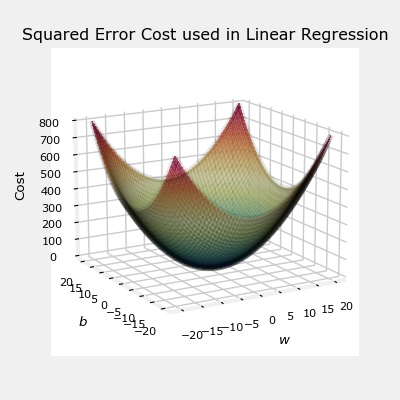

In [ ]:
plt.close("all")
soup_bowl()

In [ ]:
def plt_simple_example(x, y):
    pos = y == 1
    neg = y == 0

    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visibl = False
    fig.canvas.footer_visible = False

    ax.scatter(x[pos], y[pos], marker="x", color="red", label="malignant")
    ax.scatter(x[neg], y[neg], marker="o", ec="blue", fc="none", lw=3, label="benign")
    ax.set_ylim(-0.075, 1.1)
    ax.set_title("Example of Logistic Regression on Categorical Data")
    ax.set_ylabel("y")
    ax.set_xlabel("Tumor Size")
    ax.legend(loc="lower right")
    plt.show()

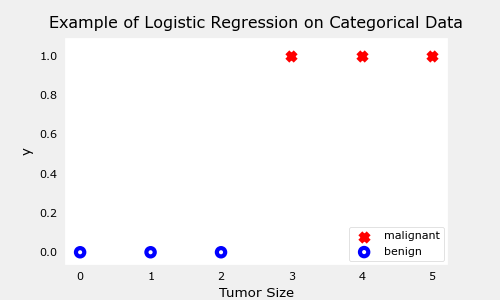

In [ ]:
x_train = np.array([0.0, 1, 2, 3, 4, 5], dtype=np.longdouble)
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.longdouble)
plt_simple_example(x_train, y_train)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def compute_cost_logistic_sq_err(X, y, w, b):
    m = X.shape[0]
    f_wb = sigmoid(np.dot(X, w) + b)
    err = (f_wb - y) ** 2
    return np.squeeze(np.sum(err) / (2 * m))
    # m = X.shape[0]
    # cost = 0.0
    # for i in range(m):
    #     z_i = np.dot(X[i],w) + b
    #     f_wb_i = sigmoid(z_i)                 #add sigmoid to normal sq error cost for linear regression
    #     cost = cost + (f_wb_i - y[i])**2
    # cost = cost / (2 * m)
    # return np.squeeze(cost)

In [ ]:
def plt_logistic_squared_error(X, y):
    """plots logistic squared error for demonstration"""
    wx, by = np.meshgrid(np.linspace(-6, 12, 50), np.linspace(10, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0])

    for i in range(points.shape[0]):
        w, b = points[i]
        # cost[i] = compute_cost_logistic_sq_err(X.reshape(-1,1), y, w, b)
        cost[i] = compute_cost_logistic_sq_err(X, y, w, b)
    cost = cost.reshape(wx.shape)
    fig = plt.figure()
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax = fig.add_subplot(1, 1, 1, projection="3d")
    ax.plot_surface(wx, by, cost, alpha=0.6, cmap="Spectral_r")
    ax.set_xlabel("w", fontsize=16)
    ax.set_ylabel("b", fontsize=16)
    ax.set_zlabel("Cost", rotation=90, fontsize=16)
    ax.set_title('"Logistic" Squared Error Cost vs (w, b)')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

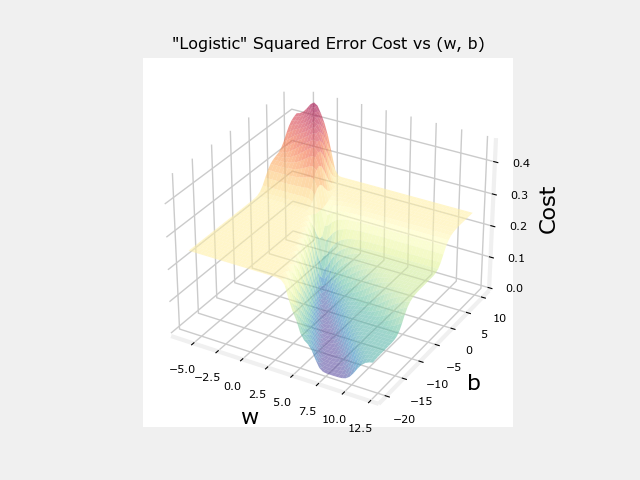

In [ ]:
plt.close("all")
plt_logistic_squared_error(x_train, y_train)
plt.show()

In [ ]:
def plt_two_logistic_loss_curves():
    fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    # x = np.linspace(0.01,1-0.01,20)
    x = np.linspace(0.01, 1 - 0.01, 20)
    ax[0].plot(x, -np.log(x))
    ax[0].text(0.5, 4.0, "y = 1", fontsize=12)
    ax[0].set_ylabel("loss")
    ax[0].set_xlabel(r"$f_{w,b}(x)$")
    ax[1].plot(x, -np.log(1 - x))
    ax[1].text(0.5, 4.0, "y = 0", fontsize=12)
    ax[1].set_xlabel(r"$f_{w,b}(x)$")
    # ax[0].annotate("prediction \nmatches \ntarget ", xy= [1,0], xycoords='data',
    #              xytext=[-10,30],textcoords='offset points', ha="right", va="center",
    #                arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 3},)
    # ax[0].annotate("loss increases as prediction\n differs from target", xy= [0.1,-np.log(0.1)], xycoords='data',
    #              xytext=[10,30],textcoords='offset points', ha="left", va="center",
    #                arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 3},)
    # ax[1].annotate("prediction \nmatches \ntarget ", xy= [0,0], xycoords='data',
    #              xytext=[10,30],textcoords='offset points', ha="left", va="center",
    #                arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 3},)
    # ax[1].annotate("loss increases as prediction\n differs from target", xy= [0.9,-np.log(1-0.9)], xycoords='data',
    #              xytext=[-10,30],textcoords='offset points', ha="right", va="center",
    #                arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 3},)
    plt.suptitle("Loss Curves for Two Categorical Target Values", fontsize=12)
    plt.tight_layout()
    plt.show()

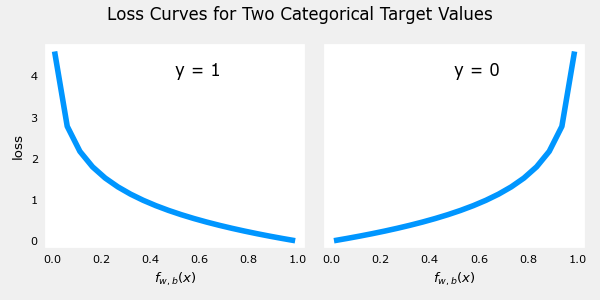

In [68]:
plt_two_logistic_loss_curves()

In [ ]:
def log_1pexp(z):
    z = np.asarray(z, dtype=np.longdouble)
    out = np.where(z >= 0, z + np.log1p(np.exp(-z)), np.log1p(np.exp(z)))
    return out

In [ ]:
def compute_cost_matrix(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    cost = -(y * z) + log_1pexp(z)
    cost = np.sum(cost) / m
    return np.squeeze(cost)

In [ ]:
def plt_logistic_cost(X, y):
    """plots logistic cost"""
    wx, by = np.meshgrid(np.linspace(-6, 12, 50), np.linspace(0, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0], dtype=np.longdouble)
    for i in range(points.shape[0]):
        w, b = points[i]
        cost[i] = compute_cost_matrix(X, y, w, b)
    cost = cost.reshape(wx.shape)
    fig = plt.figure(figsize=(9, 5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax = fig.add_subplot(1, 2, 1, projection="3d")
    ax.plot_surface(wx, by, cost, alpha=0.6, cmap="Spectral_r")
    ax.set_xlabel("w", fontsize=16)
    ax.set_ylabel("b", fontsize=16)
    ax.set_zlabel("Cost", rotation=90, fontsize=16)
    ax.set_title("Logistic Cost vs (w, b)")
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax = fig.add_subplot(1, 2, 2, projection="3d")

    ax.plot_surface(wx, by, np.log(cost), alpha=0.6, cmap="Spectral_r")

    ax.set_xlabel("w", fontsize=16)
    ax.set_ylabel("b", fontsize=16)
    ax.set_zlabel("\nlog(Cost)", fontsize=16)
    ax.set_title("log(Logistic Cost) vs (w, b)")
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    plt.show()
    return cost

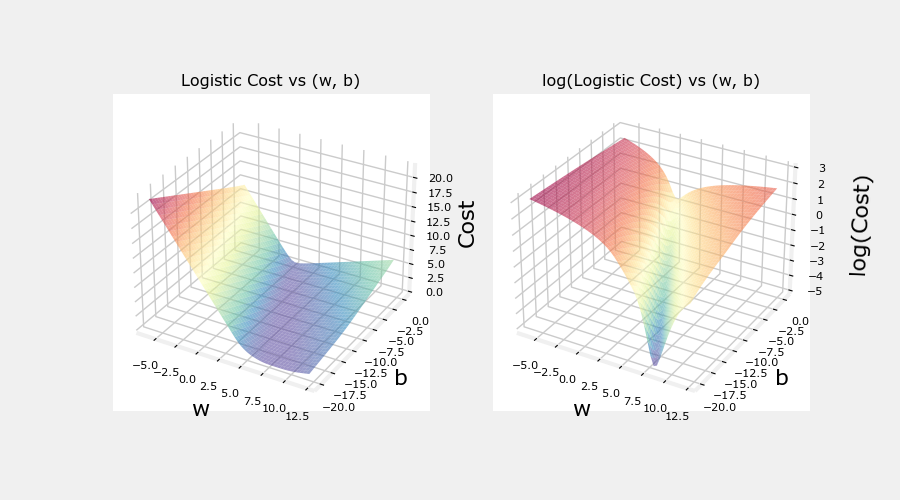

In [ ]:
plt.close("all")
cst = plt_logistic_cost(x_train, y_train)